## Importing libraries

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import pandas as pd

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
import nltk

In [5]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

### Importing Data File

In [6]:
data = pd.read_csv("Scraped_Headlines.csv")

In [7]:
headlines_txt = data.Headlines

In [8]:
headlines_txt.head()

0    Panic buying, food shortages: Shanghai residen...
1    Live: Open to India mediating in Ukraine crisi...
2    Do you know if your SIP is really an SIP? Here...
3    GST collections at record high of Rs 1.42 lakh...
4    Russia offers oil to India with big discount a...
Name: Headlines, dtype: object

### Using word tokenizier to tokenize sentences into words

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
word_tokenize("i am sad today because my pet rooney died")

['i', 'am', 'sad', 'today', 'because', 'my', 'pet', 'rooney', 'died']

In [12]:
tokenized_words = []

In [13]:
for x in range(471):
    toke = word_tokenize(headlines_txt[x])
    tokenized_words.append(toke)

In [14]:
#removing elements out of lists of list into single list

flat_list = [item for sublist in tokenized_words for item in sublist]

## Removing all special characters from list

In [15]:
# initializing special characters
special_char = "@_!#$%^&*()<>?/\|}{~:;.[],'' "
 
# using filter() to remove special characters
out_list = [''.join(filter(lambda i: i not in special_char, string)) for string in flat_list]

### Removing Stop words from headlines

In [42]:
from nltk.corpus import stopwords

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
filtered_words = [word for word in out_list if word not in stopwords.words('english')]

### Dividing words into positive, negative and neutral

In [19]:
vader = SentimentIntensityAnalyzer()

In [46]:
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in filtered_words:
    if (vader.polarity_scores(word)['compound']) >= 0.5:
        pos_word_list.append(word)
    elif (vader.polarity_scores(word)['compound']) <= -0.5:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)                

#printing first elements from each 

print('Positive :',pos_word_list[0])        
print('Neutral :',neu_word_list[0])    
print('Negative :',neg_word_list[0])

Positive : love
Neutral : buying
Negative : Panic


## Creating Wordclouds

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Most used positive words

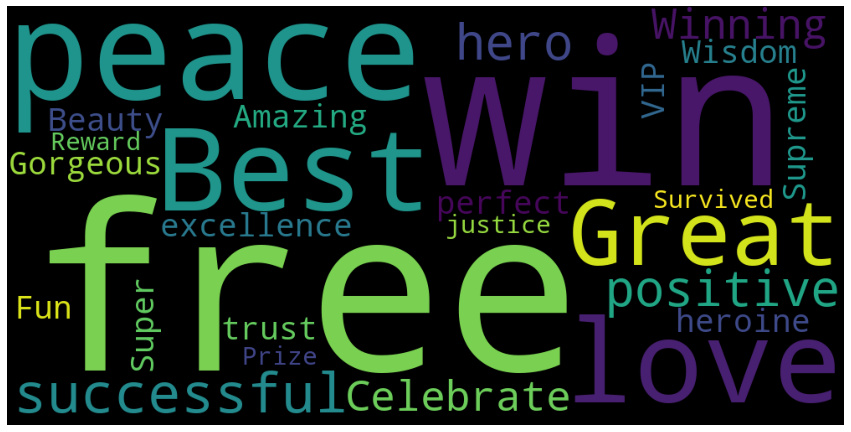

In [22]:
#Most used positive words

unique_string=(" ").join(pos_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("positive_news.png", bbox_inches='tight')
plt.show()
plt.close()

## Most used negative words

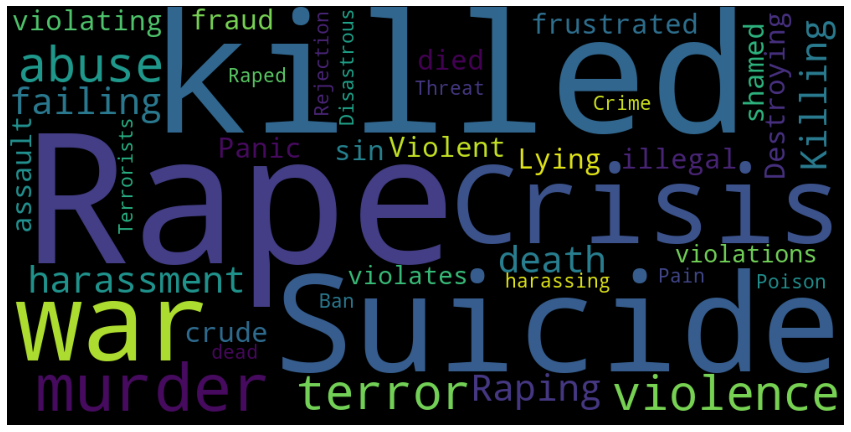

In [23]:
#Most used negative words

unique_string=(" ").join(neg_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("negative_news.png", bbox_inches='tight')
plt.show()
plt.close()

## Most used neutral words

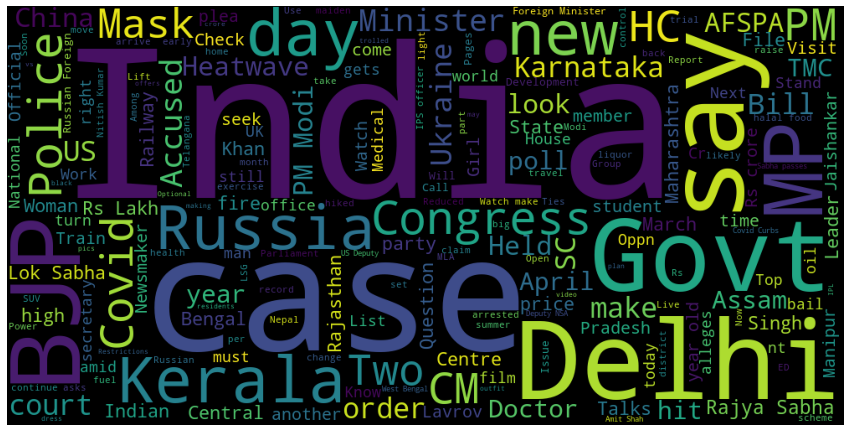

In [24]:
#Most used neutral words

unique_string=(" ").join(neu_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("neutral_news.png", bbox_inches='tight')
plt.show()
plt.close()

## Getting news headlines polarity scores

In [25]:
#Getting a random polarity score to check how this works

vader.polarity_scores(headlines_txt[0])

{'compound': -0.8074, 'neg': 0.542, 'neu': 0.458, 'pos': 0.0}

In [26]:
#getting only compound score

vader.polarity_scores("i am happy, celebration is going around. Time to cheer up")['compound']

0.7906

In [27]:
#getting only negative score

vader.polarity_scores("i will kill you and it will make everyone sad, but who cares")["neg"]

0.274

In [28]:
#Getting polarity scores for all headlines

positive_scores = []
negative_scores = []
neutral_scores = []
overall_scores = []

for i in range(472):
    positive_s = vader.polarity_scores(headlines_txt[i])['pos']
    negative_s = vader.polarity_scores(headlines_txt[i])['neg']
    neutral_s = vader.polarity_scores(headlines_txt[i])['neu']
    overall_s = vader.polarity_scores(headlines_txt[i])['compound']
    positive_scores.append(positive_s)
    negative_scores.append(negative_s)
    neutral_scores.append(neutral_s)
    overall_scores.append(overall_s)

In [29]:
#checking if we got scores for all headlines
len(neutral_scores)
len(positive_scores)
len(negative_scores)

472

## Creating final dataframe with polarity scores

In [30]:
dict1 = {"negative":negative_scores,
        "positive":positive_scores,
        "neutral":neutral_scores,
        "overall":overall_scores}

In [31]:
final_df = pd.DataFrame(dict1)

In [32]:
final_df.head()

,negative,positive,neutral,overall
0,0.542,0.000,0.458,-0.8074
1,0.313,0.000,0.687,-0.6249
2,0.000,0.078,0.922,0.0258
3,0.000,0.000,1.000,0.0000
4,0.000,0.000,1.000,0.0000


In [33]:
#combining headlines dataframe into this 

final_df.insert(0,"Headlines",headlines_txt)



In [34]:
final_df

,Headlines,negative,positive,neutral,overall
0,"Panic buying, food shortages: Shanghai residen...",0.542,0.000,0.458,-0.8074
1,Live: Open to India mediating in Ukraine crisi...,0.313,0.000,0.687,-0.6249
2,Do you know if your SIP is really an SIP? Here...,0.000,0.078,0.922,0.0258
3,GST collections at record high of Rs 1.42 lakh...,0.000,0.000,1.000,0.0000
4,Russia offers oil to India with big discount a...,0.000,0.000,1.000,0.0000
...,...,...,...,...,...
467,Fire at Delhi's Ghazipur Dumping Yard Doused A...,0.343,0.000,0.657,-0.5719
468,Heatwave in Parts of West Bengal Over Next 2 D...,0.000,0.000,1.000,0.0000
469,Speeding SUV Mows Down Pedestrian in Central D...,0.167,0.000,0.833,-0.2960
470,Nun Files Appeal in Kerala HC Against Bishop F...,0.266,0.000,0.734,-0.6908


In [35]:
final_df.describe()

,negative,positive,neutral,overall
count,472.000000,472.000000,472.000000,472.000000
mean,0.087936,0.078394,0.833676,-0.031793
std,0.142099,0.129888,0.172752,0.376605
min,0.000000,0.000000,0.336000,-0.926000
25%,0.000000,0.000000,0.709000,-0.250000
50%,0.000000,0.000000,0.843000,0.000000
75%,0.167000,0.154250,1.000000,0.083575
max,0.643000,0.659000,1.000000,0.851900


In [36]:
#checking random headline score

final_df.iloc[57]

Headlines    Himachal Pradesh: Water rationing starts in Sh...
negative                                                 0.154
positive                                                   0.0
neutral                                                  0.846
overall                                                  -0.25
Name: 57, dtype: object

In [37]:
#saving as CSV file

final_df.to_csv("headlines_with_polarity_scores.csv",index = False)

## Creating Visualization of polarity scores

In [38]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Index')

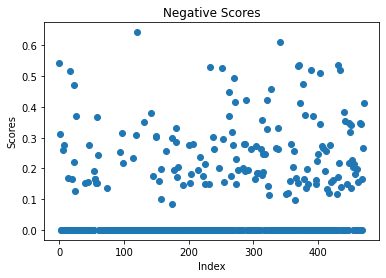

In [39]:
#Negative Scores

plt.title("Negative Scores")
plt.scatter(final_df.index.values,final_df['negative'])
plt.ylabel("Scores")
plt.xlabel("Index")

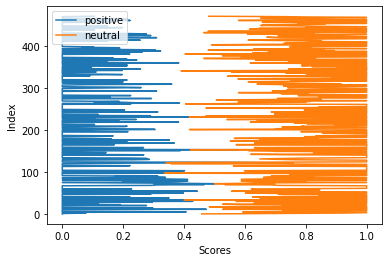

In [40]:
#Positive and Neutral Scores

plt.plot(final_df['positive'],final_df.index.values, label= "positive")
plt.plot(final_df['neutral'],final_df.index.values, label= "neutral")
plt.xlabel("Scores")
plt.ylabel("Index")
plt.legend(loc="upper left")

Text(0, 0.5, 'Frequency')

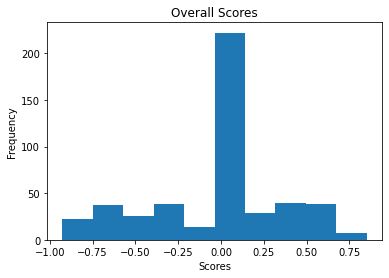

In [41]:
#Overall Score to get the final result 

plt.title("Overall Scores")
plt.hist(final_df["overall"])
plt.xlabel("Scores")
plt.ylabel("Frequency")